In [5]:
#!pip install tensorflow_datasets

In [16]:
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

max_features = 10000 # nr of words to consider as features
maxlen = 300 # cuts off the text after this nr of words among the most common words, i.e. 'max_features'

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

x_train = pad_sequences(x_train, maxlen=maxlen) # turns the list of integers above into a 2D integer tensor of shape (samples, maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen) # (same as for x_train)

In [17]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 

# From https://keras.io/layers/embeddings/      Embedding (input_dim, output_dim,..., input_length)
# input_dim: Size of the vocabulary, i.e. maximum integer index + 1.
# output_dim: Dimension of the dense embedding.--> Every word will be mapped onto a vector with, in this case, 8 elements
# input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect 
# <Flatten> then <Dense> layers upstream (without it, the shape of the dense outputs cannot be computed).

# Specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs.
# --> After the Embedding layer, the activations have shape (samples, maxlen, 8)

model.add(Flatten()) # Flattens the 3D tensor of embeddings (=(samples, maxlen, 8)) into a 2D tensor of shape (samples,maxlen*8)

model.add(Dense(1, activation="sigmoid")) # Adds the classifier sigmoid on top (https://en.wikipedia.org/wiki/Sigmoid_function)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 1)                 2401      
                                                                 
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


Number of Parameters
Embedding = vocabulary size i.e. input x output = 10.000 x 8 = 80.000

Dense = maxlen i.e. input_length x Output + 1 = 300 x 8 + 1 =2.401

*** Total params = 82.401***

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.5751 - acc: 0.7117 - val_loss: 0.3852 - val_acc: 0.8482
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2971 - acc: 0.8853 - val_loss: 0.2951 - val_acc: 0.8826
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2253 - acc: 0.9129 - val_loss: 0.2797 - val_acc: 0.8866
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1910 - acc: 0.9264 - val_loss: 0.2737 - val_acc: 0.8914
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1671 - acc: 0.9365 - val_loss: 0.2783 - val_acc: 0.8908
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1479 - acc: 0.9450 - val_loss: 0.2838 - val_acc: 0.8930
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1315 - acc: 0.9528 - val_loss: 0.2950 - val_acc: 0.8926
Epoch 8/10
625/625 [==============================] - 2s 2ms/step - loss: 0.

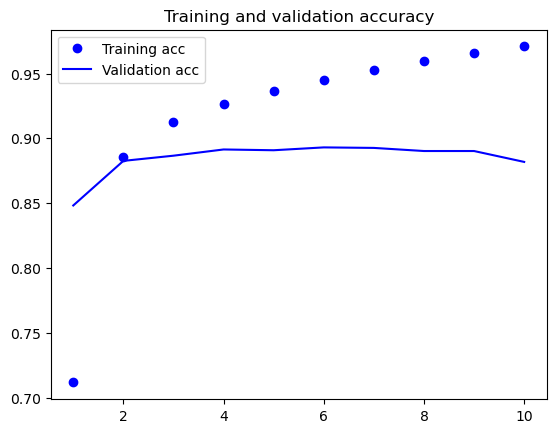

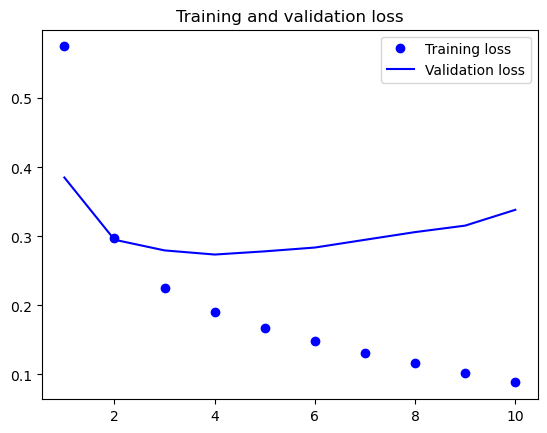

In [19]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [21]:
import os

imdb_dir = "C:/Users/Master/aclImdb_v1/aclImdb"
train_dir = os.path.join(imdb_dir, "train")

#file = open("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning.ai_Coursera/SequenceModels/WorkingWithTextData/aclImdb/train", encoding="utf8")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            #f = open(os.path.join(dir_name, fname))
            # using code above gave: UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 194: character maps to <undefined>
            # added: encoding='utf-8'
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)  

In [24]:
from keras.preprocessing.text import Tokenizer
import numpy as np

maxlen = 100 # cuts off review after 100 words
training_samples = 200 # Trains on 200 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered: 
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)

Found 76357 unique tokens.
Shape of data tensor: (18501, 100)
Shape of label tensor: (18501,)


In [29]:
glove_dir = "C:/Users/Master/glove_data/glove.6B"

embeddings_index = {}

f = open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding='utf-8') #added , encoding='utf-8'
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


In [35]:
embedding_dim = 100 # GloVe contains 100-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the mebedding index will all be zeros

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [38]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")        

Epoch 1/10
7/7 [==============================] - 1s 107ms/step - loss: 1.8429 - acc: 0.5250 - val_loss: 1.0471 - val_acc: 0.3209
Epoch 2/10
7/7 [==============================] - 0s 76ms/step - loss: 0.5538 - acc: 0.6900 - val_loss: 1.3790 - val_acc: 0.6798
Epoch 3/10
7/7 [==============================] - 0s 72ms/step - loss: 0.4469 - acc: 0.8500 - val_loss: 0.6348 - val_acc: 0.6400
Epoch 4/10
7/7 [==============================] - 0s 73ms/step - loss: 0.4345 - acc: 0.8550 - val_loss: 1.2123 - val_acc: 0.6798
Epoch 5/10
7/7 [==============================] - 0s 76ms/step - loss: 0.1892 - acc: 0.9450 - val_loss: 0.7731 - val_acc: 0.6816
Epoch 6/10
7/7 [==============================] - 2s 344ms/step - loss: 0.0942 - acc: 0.9900 - val_loss: 0.7811 - val_acc: 0.6822
Epoch 7/10
7/7 [==============================] - 1s 153ms/step - loss: 0.0615 - acc: 0.9950 - val_loss: 1.5520 - val_acc: 0.3354
Epoch 8/10
7/7 [==============================] - 0s 77ms/step - loss: 0.3622 - acc: 0.9100 - 

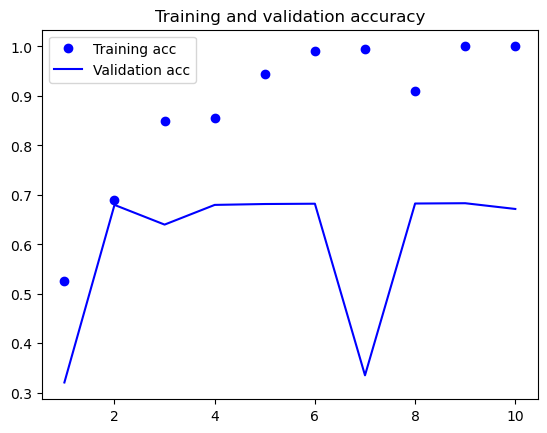

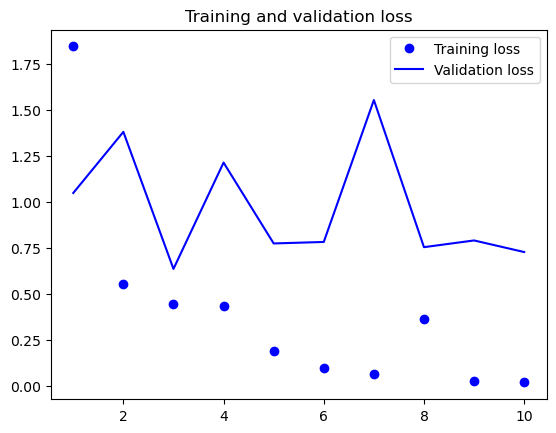

In [39]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

It can clearly be seen that the model quickly starts overfitting, which was expected given the small number of training samples. For the same reason Validation accuray has high variance.
NOTE! If you run the model again without running the Model Definition -cell, the overfitting is even more severe, since we're using same data again! Training Accuracy jumps early to 100% and -Loss becomes quickly almost nonexistant (due to vanishing gradients?)

The same model could also be trained without loading the pre-trained word embeddings (here GloVe). In that case, a task specificembedding is learned of the input tokens, which is generally more powerful, when lots of data is available. This way you can, in a way, tailormake your own model with your own data.

In [42]:
from keras.datasets import imdb

max_features = 10000 # nr of words to consider as features CUTTING THIS DOWN TO 1000 FROM 10.000!!!
maxlen = 500 # cuts off the text after this nr of words among the most common words, i.e. 'max_features' CUT FROM 500 TO 100 !!!
batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

input_train = input_train[:5000]
y_train = y_train[:5000]
input_test = input_test[:5000]
y_test = y_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = pad_sequences(input_train, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

loading data ...
5000 train sequences
5000 test sequences
Pad sequences (samples x time)
input_train shape: (5000, 500)
input_test shape: (5000,)


In [43]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 14s 290ms/step - loss: 0.7027 - acc: 0.5600 - val_loss: 0.6611 - val_acc: 0.7340
Epoch 2/10
32/32 [==============================] - 8s 241ms/step - loss: 0.6057 - acc: 0.7670 - val_loss: 0.5570 - val_acc: 0.7830
Epoch 3/10
32/32 [==============================] - 10s 313ms/step - loss: 0.4428 - acc: 0.8375 - val_loss: 0.4074 - val_acc: 0.8220
Epoch 4/10
32/32 [==============================] - 8s 249ms/step - loss: 0.3353 - acc: 0.8767 - val_loss: 0.5098 - val_acc: 0.7410
Epoch 5/10
32/32 [==============================] - 8s 237ms/step - loss: 0.2482 - acc: 0.9185 - val_loss: 0.3463 - val_acc: 0.8500
Epoch 6/10
32/32 [==============================] - 8s 243ms/step - loss: 0.1836 - acc: 0.9420 - val_loss: 0.3506 - val_acc: 0.8440
Epoch 7/10
32/32 [==============================] - 9s 286ms/step - loss: 0.1625 - acc: 0.9498 - val_loss: 0.3704 - val_acc: 0.8380
Epoch 8/10
32/32 [==============================] - 9s 284ms/step - loss: 

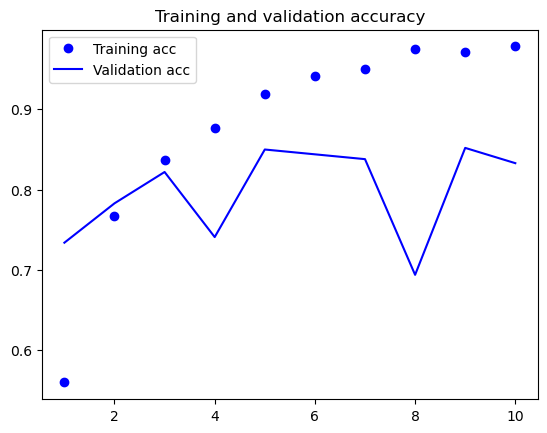

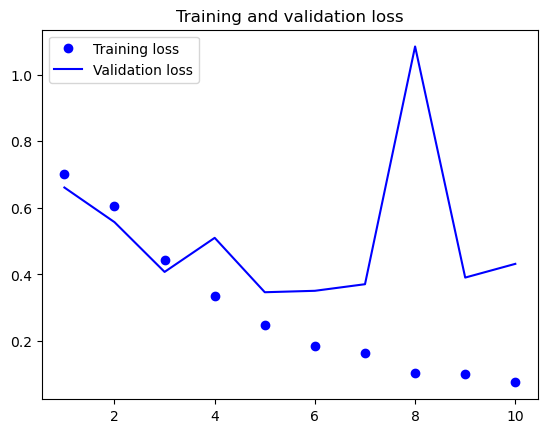

In [44]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()
